# Modelo de ML

## Configurações iniciais

In [32]:
# Importações de libraries importantes

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pickle as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import lime
from lime import lime_tabular

In [33]:
# Datasets

X_train = pl.load(open("../dados/x_train.pkl", "rb"))
X_test = pl.load(open("../dados/x_test.pkl", "rb"))
Y_train = pl.load(open("../dados/y_train.pkl", "rb"))
Y_test = pl.load(open("../dados/y_test.pkl", "rb"))
# Reshape
Y_train = Y_train.reshape(-1)
Y_test = Y_test.reshape(-1)

## Treinamento

In [24]:
# Modelo de ML
params = {
    "n_estimators": [10, 150, 300, 100, 700,  1000, 1500], "criterion": ["gini", "entropy"], 
    "max_features": ["sqrt", "log2"]}


clf = RandomForestClassifier()

grid = GridSearchCV(clf, params)

In [25]:
grid.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 150, 300, 100, 700, 1000, 1500]})

## Avaliação do Modelo

In [26]:
pred = grid.predict(X_test)

In [27]:
# Report de classificação
print(classification_report(pred, Y_test))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        94
           1       0.99      0.88      0.93       110

    accuracy                           0.93       204
   macro avg       0.93      0.94      0.93       204
weighted avg       0.94      0.93      0.93       204



In [28]:
# Acurácia do Modelo
print(f"A acurácia do modelo é: {accuracy_score(pred, Y_test)}")

A acurácia do modelo é: 0.9313725490196079


[[93  1]
 [13 97]]


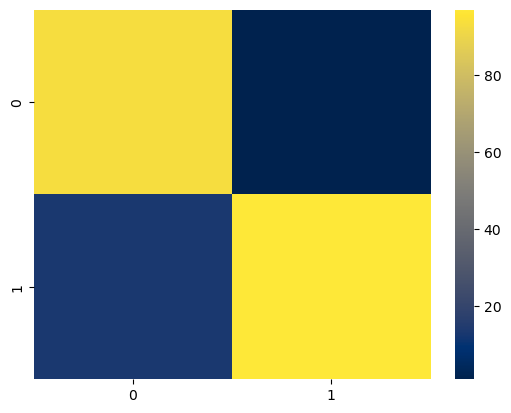

In [29]:
# Matriz de confusão
sns.heatmap(confusion_matrix(pred, Y_test), cmap="cividis")
print(confusion_matrix(pred, Y_test))

## Serialização do Modelo

In [31]:
# Serialização
modelo = grid.best_estimator_

pl.dump(modelo, open("../modelos/modelo.pkl", "wb"))